In [1]:
import numpy as np
import skimage
import matplotlib.pyplot as plt
import math
from scipy import ndimage
import itertools

In [3]:
img = skimage.data.chelsea()

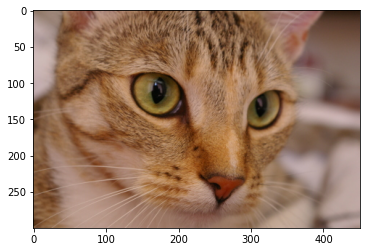

In [4]:
plt.imshow(img)
plt.show()

In [5]:
angle_rad = np.deg2rad(15)

In [12]:
cos = np.cos(angle_rad)
sin = np.sin(angle_rad)

rot_matrix = np.array([
    [c, s],
    [-s, c],
])

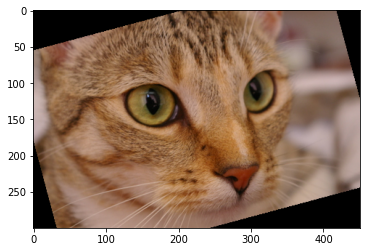

In [11]:
input_arr = np.asarray(img)
ndim = input_arr.ndim

axes = (0,1)
axes = list(axes)

img_shape = np.asarray(input_arr.shape)

in_plane_shape = img_shape[axes]
out_plane_shape = img_shape[axes]

out_center = rot_matrix @ ((out_plane_shape - 1) / 2)
in_center = (in_plane_shape - 1) / 2

offset = in_center - out_center

output_shape = img_shape
output_shape[axes] = out_plane_shape
output_shape = tuple(output_shape)

output = np.zeros(output_shape, dtype=input_arr.dtype.name)

planes_coord = itertools.product(*[[slice(None)] if ax in axes else range(img_shape[ax]) for ax in range(ndim)])
out_plane_shape = tuple(out_plane_shape)

for coordinates in planes_coord:
    ia = input_arr[coordinates]
    oa = output[coordinates]
    ndimage.affine_transform(ia, rot_matrix, offset, out_plane_shape, oa, order=3, mode='constant', cval=0.0, prefilter=True)

plt.imshow(output)
plt.show()